In [1]:
# 
# Analyzing Models with TensorBoard - Deep Learning with Python, TensorFlow and Keras
# Steg 3 - här inkluderas en hjälpfunktion från TensorBoard som loggar varje epochs
#          vars loggfil kan studeras i web broweser i realtid samtidigt som modellen itereras fram
#

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


In [3]:
#
# TensorBoard innehåller en funktion som hjälp-process för utvärdering av aktuell modell
# via mekanism som sparar "logg"-värden på disk under path "logs" för varje iterationsvarv
# Använder här aktuell tid som delvis namnsättning på loggfilerna
# NAME = "model-cats-vs-dogs-CNN"

named_tuple = time.localtime()                                  # get struct_time
time_string = time.strftime("%Y%m%d-%H%M%S", named_tuple)       # läsbart format
TxT_LOGG_fNAME = "model-cats-vs-dogs-CNN-{}".format(time_string)


print(f"  {TxT_LOGG_fNAME  =  }")



  TxT_LOGG_fNAME  =  'model-cats-vs-dogs-CNN-20250522-170319'


In [5]:
#
# Läser in tidigare sparat data från disk 

DATADIR = "C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\"  # path till katalog med djurbilder
DATADIR_MOD = DATADIR                                 # path till sparad modell

TxT_INPmod_fileN = DATADIR_MOD + "X_train.pickle"     # Filnamn indata
TxT_OUTmod_fileN = DATADIR_MOD + "y_train.pickle"     # Filnamn utdata

print(f"  {TxT_INPmod_fileN  =  }")
print(f"  {TxT_OUTmod_fileN  =  }")

pickle_in = open(TxT_INPmod_fileN,"rb")               # Läs Indata - bildmatrl
X_train = pickle.load(pickle_in)

pickle_in = open(TxT_OUTmod_fileN,"rb")               # Läs Utdata - (0/1) (katt/hund)
y_train = pickle.load(pickle_in)

X_train = X_train/255.0                               # Normera gråskallenivå, (0,255) transformeras till (0,1), utan medlevärdesförskjutning


  TxT_INPmod_fileN  =  'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\X_train.pickle'
  TxT_OUTmod_fileN  =  'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\y_train.pickle'


In [7]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))


C:\Users\larth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#
# Här definieras funktion för loggning av CNN model anpassning

tensorboard = TensorBoard(log_dir="log_steg3/{}".format(TxT_LOGG_fNAME))

print(f"  {tensorboard  =  }")


  tensorboard  =  <keras.src.callbacks.tensorboard.TensorBoard object at 0x00000157B59E1FD0>


In [11]:
# Compile the model
# Selecting a Loss Function
# The loss function (or objective function) quantifies the difference between the model's predictions 
# and the true target values. The entire training process revolves around minimizing this function. The 
# appropriate loss function depends heavily on the type of problem you are solving:
#
# Binary Classification: (Two mutually exclusive classes, e.g., spam/not-spam). Use binary_crossentropy. 
# The model's final layer should typically have one neuron with a sigmoid activation function (output∈[0,1] output∈[0,1]).


model.compile(loss='binary_crossentropy',  # Loss Function: Measures how wrong the model's predictions are compared to the actual target values
              optimizer='adam',            # Optimizer: How the model's weights are updated based on the data it sees.
              metrics=['accuracy'],
              )


# Some common choices of optimizer
#     'sgd': Stochastic Gradient Descent, often with momentum. A foundational optimizer.
# 'rmsprop': Root Mean Square Propagation, effective in many situations.
#   'adam': Adaptive Moment Estimation, often a good default choice due to its 
#           adaptive learning rate capabilities and general robustness. It combines ideas from RMSprop and momentum.



In [13]:
# Modelanpassning - callback mot tensorn tensorboard 

model.fit(X_train, y_train,
          batch_size=32,
          epochs=15,
          validation_split=0.3,
          callbacks=[tensorboard])

# Samtidigt som modellen tränas
# Starta en CMD från samma path som detta -->  C:\Users\larth\PythUtb\InlUppg_2\SKARP\Cats_and_Dogs>
# Kör från CMD  -->  kör kommandot:   tensorboard --logdir='log_steg3'
# Kör från web browser    -->  http://localhost:6006/ 
#



Epoch 1/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.6624 - loss: 0.9051 - val_accuracy: 0.8307 - val_loss: 0.3769
Epoch 2/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.8391 - loss: 0.3700 - val_accuracy: 0.8472 - val_loss: 0.3534
Epoch 3/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.8599 - loss: 0.3178 - val_accuracy: 0.8610 - val_loss: 0.3309
Epoch 4/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.8811 - loss: 0.2755 - val_accuracy: 0.8095 - val_loss: 0.4256
Epoch 5/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8968 - loss: 0.2442 - val_accuracy: 0.8584 - val_loss: 0.3372
Epoch 6/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.9018 - loss: 0.2277 - val_accuracy: 0.8671 - val_loss: 0.3287
Epoch 7/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9215 - loss: 0.2025 - val_accuracy: 0.8628 - val_loss: 0.3506
Epoch 8/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.9289 - loss: 0.1787 - val_accu

In [9]:
#
# SLUTSATS :: Utifrån aktuell mängd bilder på katter och hundar, visar utvärdering på träning och validering att
#    i. 15 varvs iteration "epochs" är för mycket - stor sannolikhet för överanpassning
#    ii. Endast 1 epochs ger underanpassad modell
#   iii. Ca. 5-10 'epochs'-steg ser ut att ge stabil modell, map anpassningsdatat som används här
#    iv. 'epochs'-steg 6: --> accuracy: (train, val) ~ (0.90, 0.87)  [1 är optimalt, 0 påvisar fullständigt oberoende]
#                                 -->     loss: (train, val) ~ (0.23, 0.33) samt riktning (minskande, minskande)
#

In [15]:
# Hur ser modellen ut grafiskt

# pip install pydot
import pydot
from tensorflow.keras.utils import plot_model

pm = plot_model(model, to_file="modellstruktur.png", show_shapes=True, show_layer_names=True)

#       Sparar bilden till modellstruktur.png.
#       show_shapes  =  True visar in- och utmatningsdimensioner för varje lager (väldigt användbart).
#       show_layer_names = True visar lagrens namn.


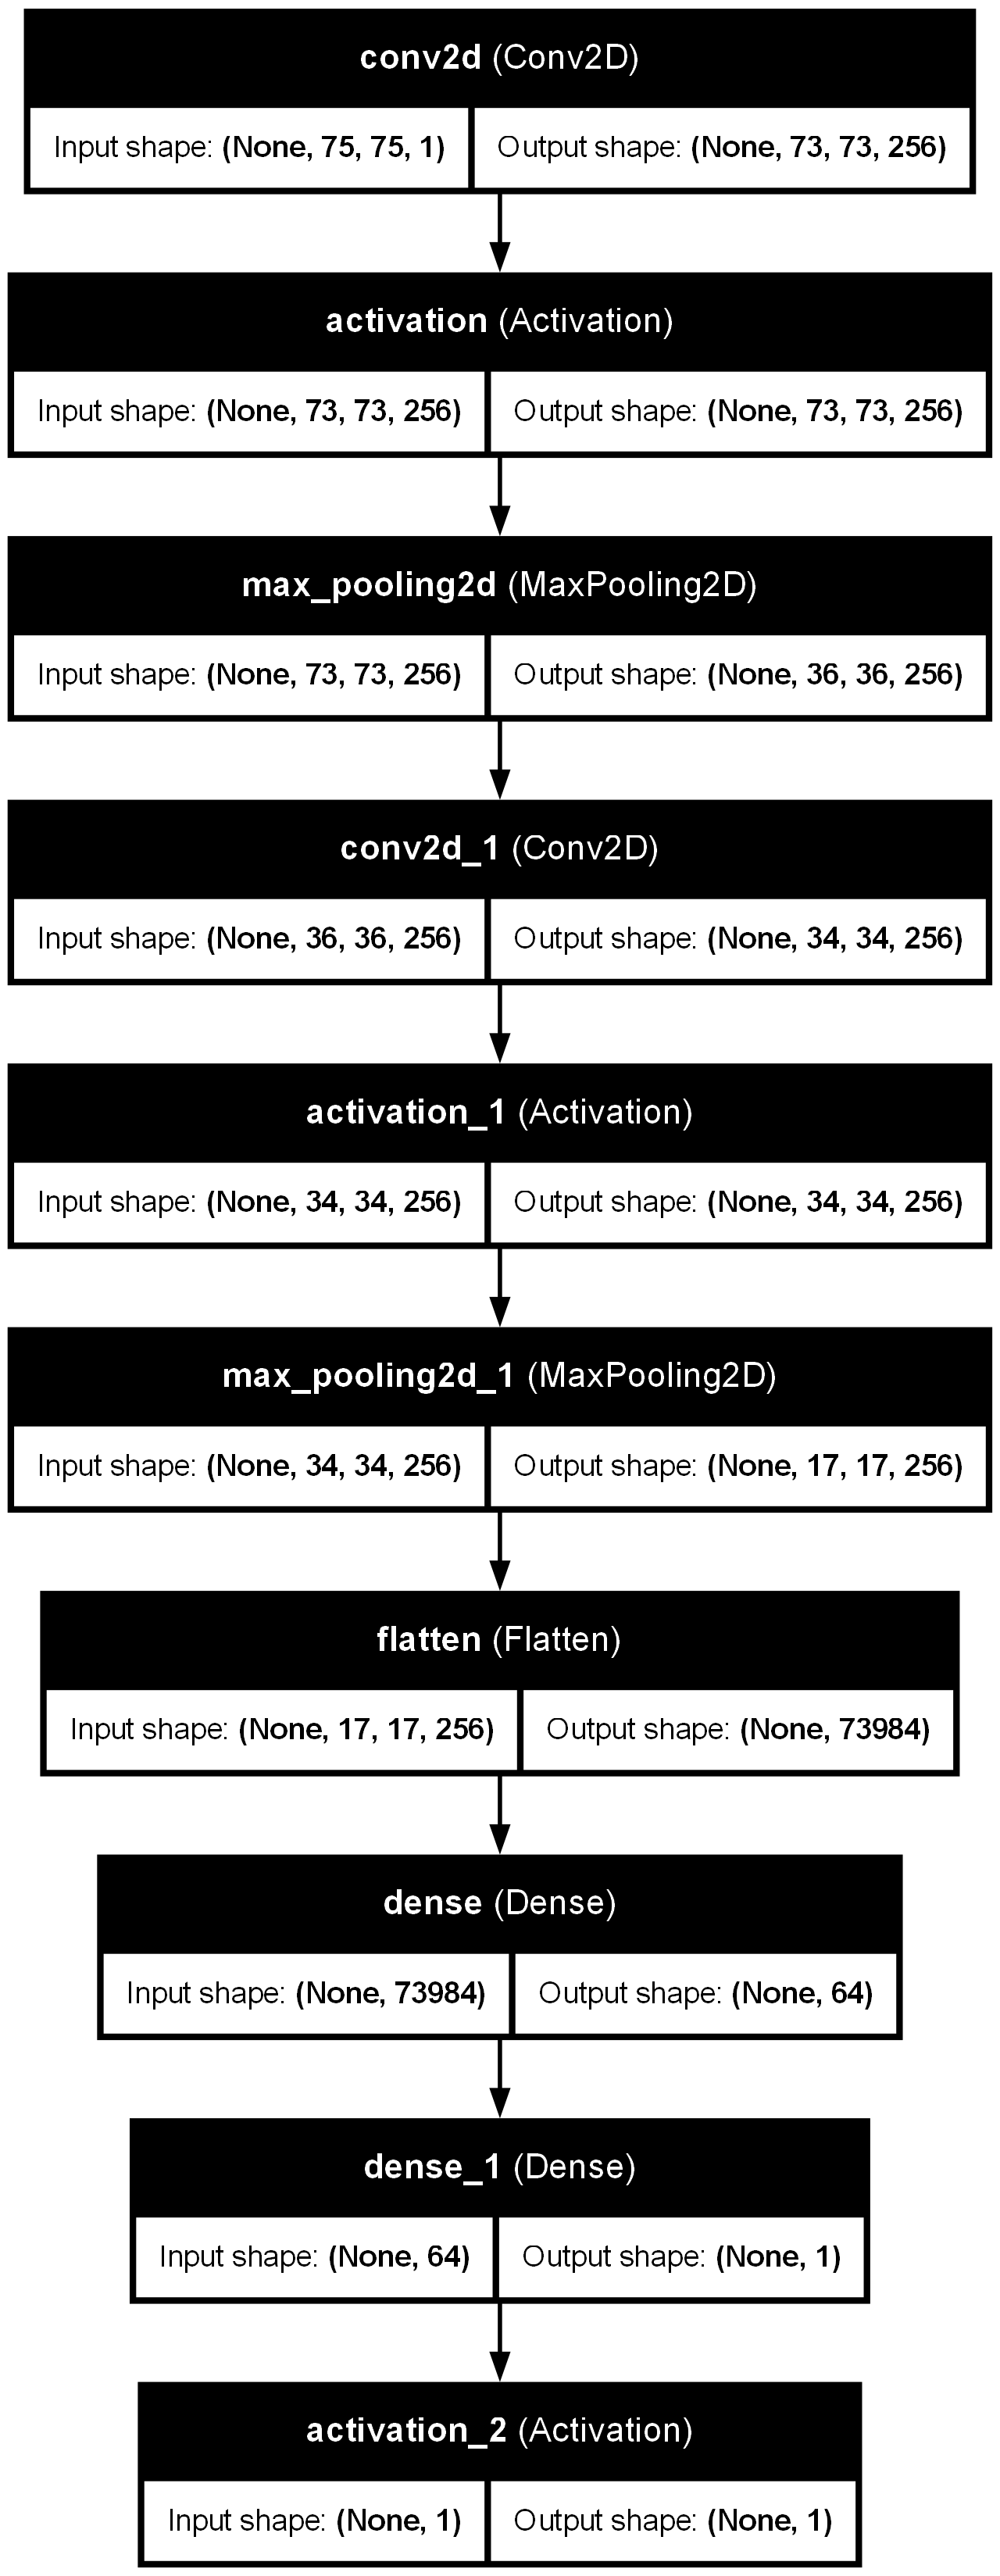

In [17]:
# För att se bilden direkt i t.ex. en Jupyter Notebook

from IPython.display import Image
Image(filename='modellstruktur.png')


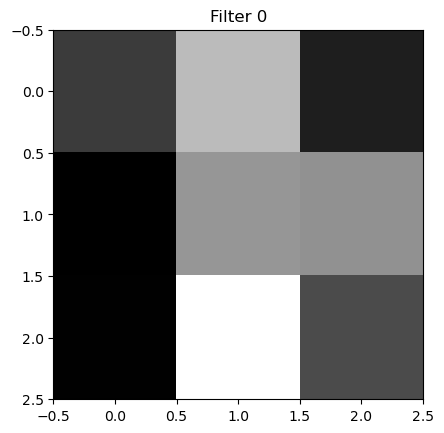

In [19]:
# Första lagret är ett Conv2D-lager
# Visa vikterna (filtren)  –  ger en känsla för hurdana mönster modellen fångar

first_layer = model.layers[0]
weights, biases = first_layer.get_weights()

import matplotlib.pyplot as plt
import numpy as np

# Normera och visa första 6 filtren
nom_of_weights = 1
for i in range(nom_of_weights):
    f = weights[:, :, :, i]
    f_min, f_max = f.min(), f.max()
    f = (f - f_min) / (f_max - f_min)  # normalisera för visning
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.title(f"Filter {i}")
    plt.show()


In [21]:


#####################################################################
# Visualisera med feature maps
# Inför funktionen "visualisera_feature_maps()"


def visualize_feature_maps(model, image, layer_limit=None):
    """
    Visualiserar feature maps från alla Conv2D-lager i modellen för en given bild.

    Parametrar:
    - model: Tränad Keras Sequential-modell med Conv2D-lager.
    - image: En bild med shape (28,28,1) eller (1,28,28,1).
    - layer_limit: (valfritt) Begränsar hur många Conv2D-lager som visualiseras.
    """
    # Se till att bilden har rätt batch-dimension
    if image.ndim == 3:
        img_input = np.expand_dims(image, axis=0)
    else:
        img_input = image

    # Hämta utgångar från alla Conv2D-lager
    conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    if layer_limit:
        conv_layers = conv_layers[:layer_limit]

    layer_outputs = [layer.output for layer in conv_layers]
    layer_names = [layer.name for layer in conv_layers]

    # Skapa modell som ger tillgång till mellanliggande aktiveringar
    activation_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

    # Få aktiveringar från bilden
    activations = activation_model.predict(img_input)

    # Visualisera varje lager
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]  # antal feature maps
        size = layer_activation.shape[1]         # höjd/bredd på varje map

        n_cols = min(n_features, 20)  # visa max 20 kolumner eller minsta antalet filter per lager
        display_grid = np.zeros((size, n_cols * size))

        for col in range(n_cols):
            channel_image = layer_activation[0, :, :, col]
            channel_image -= channel_image.mean()
            channel_image /= (channel_image.std() + 1e-5)
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[:, col * size : (col + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(f"Feature maps from layer: {layer_name}")
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.axis('off')
        plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


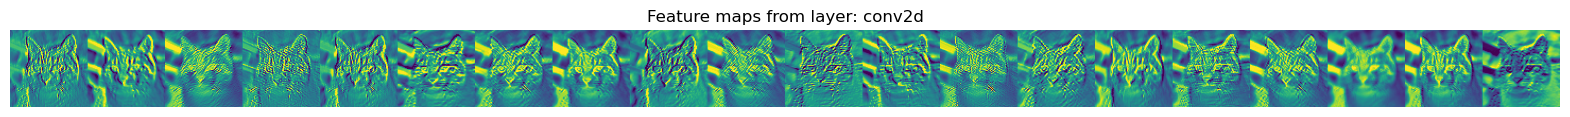

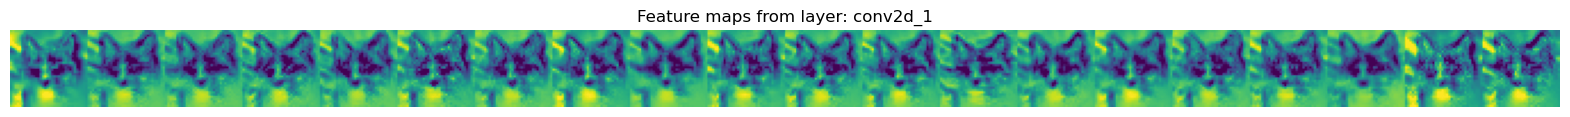

In [27]:
#
# Reell visualisering
#

# Välj en bild från testmängden
sample_img = X_train[0]

# Visualisera aktiveringar
visualize_feature_maps(model, sample_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


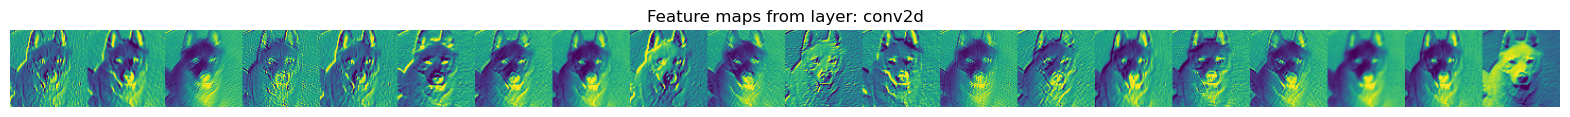

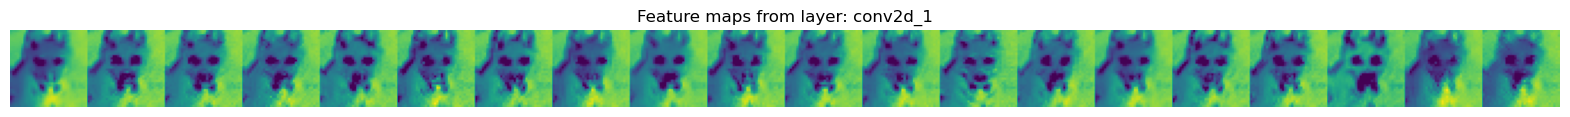

In [29]:
#
# Reell visualisering
#

# Välj en bild från testmängden
sample_img = X_train[1]

# Visualisera aktiveringar
visualize_feature_maps(model, sample_img)